In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import boxcox
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
series = pd.read_csv('Crude Oil WTI Futures Historical Data.csv',index_col=0,parse_dates=True)

In [ ]:
series = series['Price']

In [ ]:
series

Date
2019-08-23    54.17
2019-08-22    55.35
2019-08-21    55.68
2019-08-20    56.34
2019-08-19    56.21
              ...  
2000-01-10    24.67
2000-01-07    24.22
2000-01-06    24.78
2000-01-05    24.91
2000-01-04    25.55
Name: Price, Length: 5000, dtype: float64

In [ ]:
upsample = series.resample('D').mean()

In [ ]:
series = upsample.interpolate(method='linear')

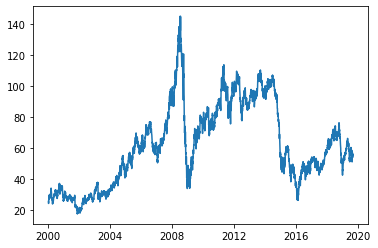

In [ ]:
plt.plot(series)

In [ ]:
series = series.loc[:'2008']

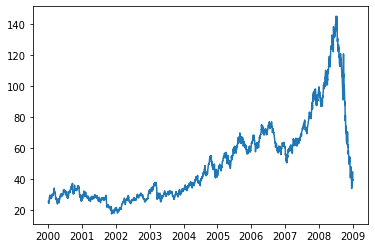

In [ ]:
plt.plot(series)

In [ ]:
X = series.values
split= int(len(X)/2)
X1,X2 = X[0:split],X[split:]
mean1,mean2 = X1.mean() , X2.mean()
var1 , var2 = X1.var() , X2.var()
print('mean1 : {} , mean2 : {} '.format(mean1,mean2))
print('variance1 : {} , variance2 : {} '.format(var1,var2))

mean1 : 29.297691839220462 , mean2 : 70.71643639683505 
variance1 : 20.884274577996738 , variance2 : 539.2245182084555 


### The mean and variance results shows that the series is not stationary since the mean is not 0 at different timestamps and variance is also not constant

In [ ]:
result = adfuller(X)
print('Adfuller statistics: {}'.format(result[0]))
print('p - value : {}'.format(result[1]))
print('Critical Values : ')
for key , value in result[4].items():
    print('{}: {}'.format(key,value))

Adfuller statistics: -1.5940588375290257
p - value : 0.48657726299607895
Critical Values : 
1%: -3.432359970177518
5%: -2.862428084811229
10%: -2.5672427465340872


### P value being greater than 0.05 , we concluded that the series is not stationary

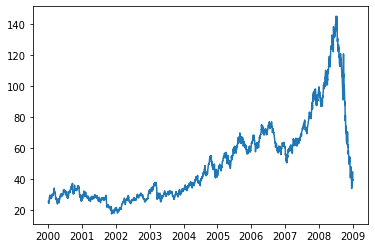

In [ ]:
plt.plot(series)

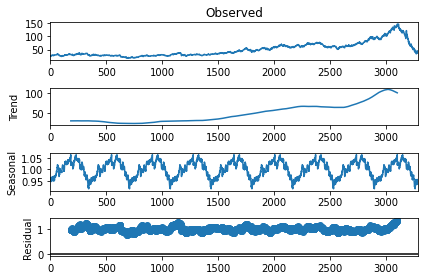

In [ ]:
decompose = seasonal_decompose(X,model='multiplicative',period=365)
decompose.plot()
plt.show()

### We can see the trend and seasonality both are present

In [ ]:
## INVERSE TRANSFORM
X = series.values
transform = boxcox(X,lmbda = -1.0)
result = adfuller(transform)
print('Adfuller statistics: {}'.format(result[0]))
print('p - value : {}'.format(result[1]))
print('Critical Values : ')
for key , value in result[4].items():
    print('{}: {}'.format(key,value))

Adfuller statistics: -1.612600977577517
p - value : 0.47661038997070265
Critical Values : 
1%: -3.4323476896620915
5%: -2.862422660610693
10%: -2.567239858805894


In [ ]:
## LOG TRANSFORM

X = series.values
transform = boxcox(X,lmbda = 0.0)
result = adfuller(transform)
print('Adfuller statistics: {}'.format(result[0]))
print('p - value : {}'.format(result[1]))
print('Critical Values : ')
for key , value in result[4].items():
    print('{}: {}'.format(key,value))

Adfuller statistics: -1.3770477341916805
p - value : 0.5932289282634579
Critical Values : 
1%: -3.4323476896620915
5%: -2.862422660610693
10%: -2.567239858805894


In [ ]:
## SQUARE ROOT TRANSFORM
X = series.values
transform = boxcox(X,lmbda = 0.5)
result = adfuller(transform)
print('Adfuller statistics: {}'.format(result[0]))
print('p - value : {}'.format(result[1]))
print('Critical Values : ')
for key , value in result[4].items():
    print('{}: {}'.format(key,value))

Adfuller statistics: -1.4188623759764165
p - value : 0.573200600851771
Critical Values : 
1%: -3.4323562701985906
5%: -2.8624264505639583
10%: -2.567241876495445


### The above ADF score tells us inverse transform was better since it has less p value

#### Moving Average Smoothing with AD Fuller results

In [ ]:
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()

In [ ]:
result = adfuller(rolling_mean[2:])
print('Adfuller statistics: {}'.format(result[0]))
print('p - value : {}'.format(result[1]))
print('Critical Values : ')
for key , value in result[4].items():
    print('{}: {}'.format(key,value))

Adfuller statistics: -1.652888041876318
p - value : 0.455534663712774
Critical Values : 
1%: -3.4323612065383737
5%: -2.8624286309001996
10%: -2.5672430372603676


#### Differencing with AD Fuller results

In [ ]:
X = series.values
diff = list()
d = 7
for i in range(d,len(X)):
    j = X[i] - X[i-d]
    diff.append(j)

In [ ]:
result = adfuller(diff)
print('Adfuller statistics: {}'.format(result[0]))
print('p - value : {}'.format(result[1]))
print('Critical Values : ')
for key , value in result[4].items():
    print('{}: {}'.format(key,value))

Adfuller statistics: -7.3669998696779055
p - value : 9.18051123998426e-11
Critical Values : 
1%: -3.4323649247638532
5%: -2.862430273204085
10%: -2.5672439115886396


In [ ]:
X = diff.copy()
split = int(0.7*len(diff))
train , test = X[:split] , X[split:]

(0.0, 100.0)

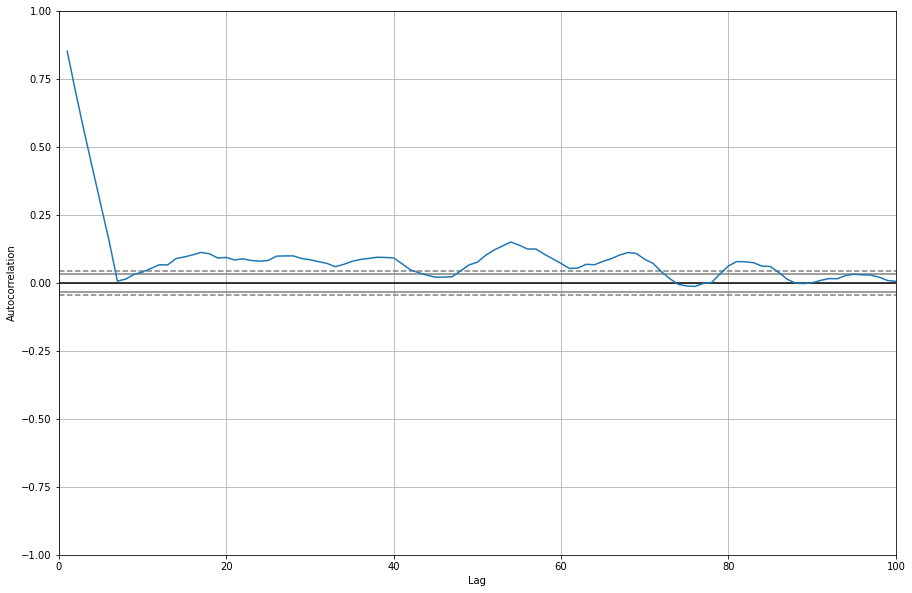

In [ ]:
ax = plt.figure(figsize=(15,10))
ax = autocorrelation_plot(X)
ax.set_xlim([0,100])

In [ ]:
model = AutoReg(train,lags=10).fit()

In [ ]:
predictions = model.predict(start=len(train),end=len(train)+len(test)-1)

In [ ]:
rmse = sqrt(mean_squared_error(test,predictions))
print('Auto Regression RMSE Score : '+str(rmse))

Auto Regression RMSE Score : 4.404691393744099


In [ ]:
def persistence_model(x):
    return x

In [ ]:
df = pd.DataFrame(series.values)
df = pd.concat([series.shift(1),series],axis=1)
df.columns = ['t-1','t']
df.head(10)

,t-1,t
Date,,
2000-01-04,NaN,25.55
2000-01-05,25.55,24.91
2000-01-06,24.91,24.78
2000-01-07,24.78,24.22
2000-01-08,24.22,24.37
2000-01-09,24.37,24.52
2000-01-10,24.52,24.67
2000-01-11,24.67,25.77
2000-01-12,25.77,26.28


In [ ]:
X = df.values
split = int(len(X)*0.7)
train , test = X[1:split] , X[split:]
train_x , train_y = train[:,0] , train[:,1]
test_x , test_y = test[:,0] , test[:,1]

In [ ]:
predictions = test_x
rmse = np.sqrt(mean_squared_error(test_y,predictions))
print('Persistence model predictions : '+str(rmse))

Persistence model predictions : 1.676773827894538


In [ ]:
train_resid = [train_y[i] - train_x[i] for i in range(len(train_x))]
model = AutoReg(train_resid,lags=20).fit()

In [ ]:
window = 20
coef = model.params

In [ ]:
history = train_resid[len(train_resid)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
expected_error = list()
for t in range(len(test_y)):
    yhat = test_x[t]
    error = test_y[t] - yhat
    expected_error.append(error)
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    pred_error = coef[0]
    for d in range(window):
        pred_error += coef[d+1] * lag[window-d-1]
    yhat = yhat + pred_error
    predictions.append(yhat)
    history.append(error)
rmse = sqrt(mean_squared_error(test_y, predictions))
print('MA MODEL RMSE : '+str(rmse))

MA MODEL RMSE : 1.678620118356785


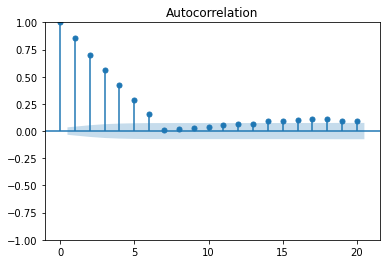

In [ ]:
plot_acf(diff,lags=20)
plt.show()

#### I chose q =6 from acf plot 

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


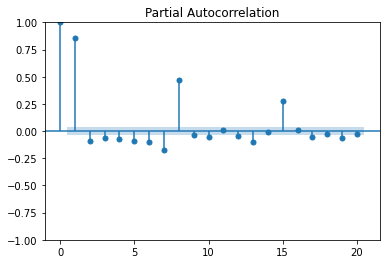

In [ ]:
plot_pacf(diff,lags=20)
plt.show()

#### I chose p =2 from pacf plot

In [ ]:
len(diff)

3278

In [ ]:
X = diff.copy()
train, test = X[0:3270], X[3270:]
model = ARIMA(train,order=(2,1,6)).fit()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3270
Model:                 ARIMA(2, 1, 6)   Log Likelihood               -5413.697
Date:                Tue, 19 Apr 2022   AIC                          10845.394
Time:                        03:42:57   BIC                          10900.225
Sample:                             0   HQIC                         10865.031
                               - 3270                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9079      0.019    -48.606      0.000      -0.945      -0.871
ar.L2         -0.3419      0.015    -22.334      0.000      -0.372      -0.312
ma.L1          1.1705      0.020     59.433      0.000       1.132       1.209
ma.L2          0.4643      0.025     18.617      0.000       0.415       0.513
ma.L3         -0.5573      0.012    -47.094      0.000      -0.580      -0.534
ma.L4         -1.1506      0.010   -111.421      0.000      -1.171      -1.130
ma.L5         -0.8662      0.023    -37.280      0.000      -0.912      -0.821
ma.L6          0.0866      0.019      4.475      0.000       0.049       0.125
sigma2         1.6114      0.018     87.971      0.000       1.575       1.647
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             11332.28
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               8.33   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
predictions = list()
for i in range(len(test)):
    model = ARIMA(train, order=(2,1,6))
    model = model.fit()
    output = model.forecast()
    yhat = output[0]
    predictions.append(yhat)
    train.append(test[i])


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization 

In [ ]:
rmse = np.sqrt(mean_squared_error(test, predictions))
print("ARIMA RMSE : "+str(rmse))

ARIMA RMSE : 3.3001906560530343


In [ ]:
def arima_model(X, arima_order):
    
    train , test = X[0:3270] , X[3270:]
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order=arima_order).fit()
        yhat = model.forecast()[0]
        predictions.append(yhat)
        train.append(test[i])
        
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse    

In [ ]:
def gridsearch_arima(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                rmse = arima_model(dataset, order)
                if rmse < best_score:
                    best_score, best_cfg = rmse, order
                print('ARIMA%s RMSE=%.3f' % (order,rmse))

    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

#### BEST ARIMA SCORE was when RMSE = 3.725 with (p,d,q) = (3,1,0). I chose the test length to be very small because the arima model was taking too much time in prediction , for every single prediction. the train had to be appended and then trained again the model to make next prediction.